In [1]:
# 1. 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.charts import Pie

from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\\Windows\\Fonts\\simhei.ttf', size=14)

# 2. 加载数据集
# 2. 加载数据集
world_cups_summary = pd.read_csv('data/WorldCupsSummary.csv', encoding='ISO-8859-1')
world_cup_matches = pd.read_csv('data/WorldCupMatches.csv', encoding='ISO-8859-1')
world_cup_players = pd.read_csv('data/WorldCupPlayers.csv', encoding='ISO-8859-1')

# 3. 数据预处理
world_cups_summary = world_cups_summary.fillna('')
world_cup_matches = world_cup_matches.fillna('')
world_cup_players = world_cup_players.fillna('')


In [ ]:

# 统计每个大洲的冠军次数
continent_counts = world_cups_summary['WinnerContinent'].value_counts()

# 创建饼图
pie = (
  Pie()
  .add("", [list(z) for z in zip(continent_counts.index.tolist(), continent_counts.values.tolist())])
  .set_global_opts(title_opts=opts.TitleOpts(title="世界杯冠军大洲分布"))
  .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
)

# 显示图表
pie.render('.\\results\\世界杯冠军大洲分布.html')


In [ ]:
# 1. 计算每个大洲举办世界杯的次数
continent_counts = world_cups_summary['HostContinent'].value_counts()

# 创建饼图
plt.figure(figsize=(10, 6))
plt.pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%')
plt.title('历届世界杯主办国所在大洲分布', fontproperties=myfont)
plt.savefig('.\\results\\历届世界杯主办国所在大洲分布.png')
plt.show()

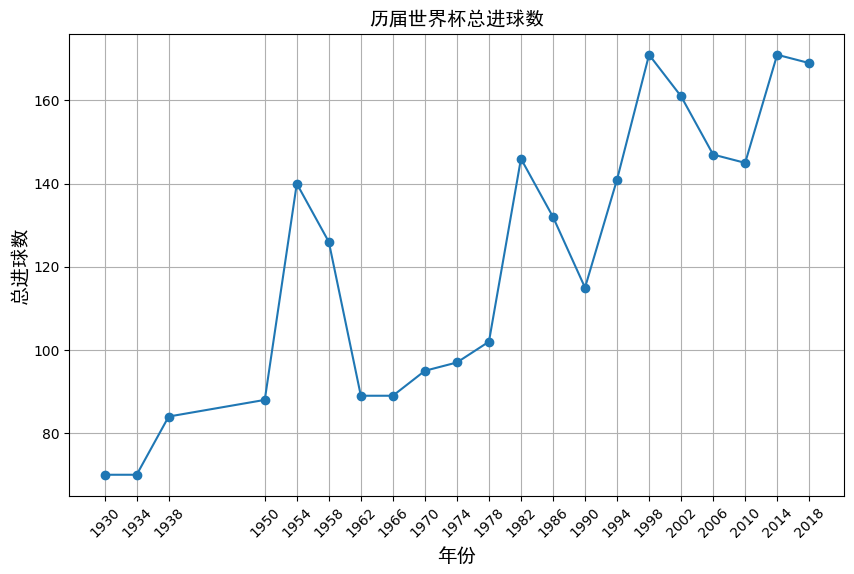

In [6]:
# 2. 每届世界杯的总进球数的折线图
plt.figure(figsize=(10, 6))
plt.plot(world_cups_summary['Year'], world_cups_summary['GoalsScored'], marker='o')

# 设置x轴的刻度和倾斜角度
plt.xticks(world_cups_summary['Year'], rotation=45)

plt.title('历届世界杯总进球数', fontproperties=myfont)
plt.xlabel('年份', fontproperties=myfont)
plt.ylabel('总进球数', fontproperties=myfont)
plt.grid(True)
plt.savefig('.\\results\\历届世界杯总进球数.png')
plt.show()


In [52]:
# 历届世界杯场均进球数折线图
import math
from pyecharts.charts import Line, Grid
from pyecharts.charts import Page

# 计算每届世界杯的场均进球数
world_cups_summary['AverageGoals'] = world_cups_summary['GoalsScored'] / world_cups_summary['MatchesPlayed']

# 获取x和y的列表
x = list(map(str, world_cups_summary['Year'].tolist()))
y1 = list(map(lambda x: round(x, 1), world_cups_summary['AverageGoals'].tolist()))
y2 = world_cups_summary['Attendance'].tolist()
y3 = world_cups_summary['QualifiedTeams'].tolist()

# 创建折线图
line1 = (
  Line()
  .add_xaxis(x)
  .add_yaxis("场均进球数", y1, markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="max", name="最大值")]),
             label_opts=opts.LabelOpts(is_show=False)
             )
  .set_global_opts(title_opts=opts.TitleOpts(title='历届世界杯场均进球数折线图')
                   )
)

line2 = (
  Line()
  .add_xaxis(x)
  .add_yaxis("现场观众总人数", y2, 
             markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="max", name="最大值")]),
             label_opts=opts.LabelOpts(is_show=False)
             )
  .set_global_opts(title_opts=opts.TitleOpts(title='历届世界杯现场观众总人数折线图')
                   )
)

# 创建第三个折线图
line3 = (
  Line()
  .add_xaxis(x)
  .add_yaxis("总参赛队伍数", y3, label_opts=opts.LabelOpts(is_show=False), markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="max", name="最大值")]))
  .set_global_opts(title_opts=opts.TitleOpts(title='历届世界杯总参赛队伍数折线图')
                   )
)
# 创建Page布局
page = Page()

# 将折线图添加到Page布局
page.add(line1)
page.add(line2)
page.add(line3)

# 显示折线图
page.render(f".\\results\\历届世界杯场均进球数、现场观众总人数与总参赛队伍数折线图.html")

'd:\\D\\2023_Fall\\required_course\\dvisual\\exps\\exp3\\worldcup\\results\\历届世界杯场均进球数、现场观众总人数与总参赛队伍数折线图.html'

In [ ]:
# 计算每个队伍进球数和牌数


# 计算每个国家队的总进球数
home_goals = world_cup_matches.groupby('Home Team Initials')['Home Team Goals'].sum()
away_goals = world_cup_matches.groupby('Away Team Initials')['Away Team Goals'].sum()
total_goals = home_goals.add(away_goals, fill_value=0)

# 计算每个国家队的比赛数
total_matches = world_cup_matches['Home Team Initials'].value_counts() + world_cup_matches['Away Team Initials'].value_counts()

# 计算每个国家队的平均进球数
average_goals = total_goals / total_matches
average_goals = average_goals.sort_values(ascending=False)

# 发生黄牌或红牌的队伍
card_events = world_cup_players['Event'].str.contains('Y|R')
# print('card_events:', card_events)
card_teams = world_cup_players[card_events]['Team Initials']
# print('card_teams:', card_teams)

# 计算每个队伍的黄牌或红牌数
card_counts = card_teams.value_counts()
average_cards = card_counts / total_matches


bar_width = 0.35
# 创建一个新的DataFrame，包含每个队伍的进球数和红/黄牌数
team_stats = pd.DataFrame({
    'Goals': average_goals,
    'Cards': average_cards
})

# 按进球数从多到少排序
team_stats = team_stats.sort_values(by='Goals', ascending=False)

# 创建进球数的柱状图
bar1 = (
  Bar(init_opts=opts.InitOpts(width='100%'))
  .add_xaxis(team_stats.index.tolist())
  .add_yaxis("Goals", team_stats['Goals'].round(1).tolist(), color='lightblue', 
             label_opts=opts.LabelOpts(is_show=False))
  .extend_axis(
    yaxis=opts.AxisOpts(
      type_="value",
      name="Cards",
      min_=0,
      max_=5,
      position="right",
      axisline_opts=opts.AxisLineOpts(
        linestyle_opts=opts.LineStyleOpts(color="red")
      ),
      axislabel_opts=opts.LabelOpts(formatter="{value}"),
    )
  )
  .set_global_opts(
    title_opts=opts.TitleOpts(title="国家队场均进球数和红/黄牌数"),
    xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=75, font_size=12)),
    )
)

# 创建红/黄牌数的柱状图
bar2 = (
  Bar()
  .add_xaxis(team_stats.index.tolist())
  .add_yaxis("Cards", team_stats['Cards'].round(1).tolist(), color='pink', yaxis_index=1, 
             label_opts=opts.LabelOpts(is_show=False))
)

# 将两个柱状图重叠在一起
bar1.overlap(bar2)
bar1.render('.\\results\\国家队场均进球数和红黄牌数.html')


In [ ]:
# 合并冠亚季
top_continents = pd.concat([world_cups_summary['Winner'], world_cups_summary['Second'], world_cups_summary['Third']])

# 统计每个大洲的次数
continent_counts = top_continents.value_counts()

# 创建柱状图
bar = (
  Bar()
  .add_xaxis(continent_counts.index.tolist())
  .add_yaxis("", continent_counts.values.tolist(), label_opts=opts.LabelOpts(is_show=True))
  .set_global_opts(title_opts=opts.TitleOpts(title="世界杯前三名队伍柱状图"))
)

# 显示图表
bar.render('.\\results\\世界杯前三名队伍柱状图.html')


In [ ]:
from pyecharts.charts import WordCloud

# 统计每个主裁的出现次数
referee_counts = world_cup_matches['Referee'].value_counts()

# 创建词云
wordcloud = (
  WordCloud()
  .add("", [list(z) for z in zip(referee_counts.index.tolist(), referee_counts.values.tolist())], word_size_range=[20, 100])
  .set_global_opts(title_opts=opts.TitleOpts(title="主裁出现频率词云"))
)

# 显示词云
wordcloud.render('.\\results\\主裁出现频率词云.html')

In [ ]:

bar_width = 0.35
# 创建一个新的DataFrame，包含每个队伍的进球数和红/黄牌数
team_stats = pd.DataFrame({
    'Goals': average_goals,
    'Cards': average_cards
})

# 按进球数从多到少排序
team_stats = team_stats.sort_values(by='Goals', ascending=False)



# 创建进球数的柱状图
bar1 = (
  Bar(init_opts=opts.InitOpts(width='100%'))
  .add_xaxis(team_stats.index.tolist())
  .add_yaxis("Goals", team_stats['Goals'].round(1).tolist(), color='lightblue', 
             label_opts=opts.LabelOpts(is_show=False))
  .extend_axis(
    yaxis=opts.AxisOpts(
      type_="value",
      name="Cards",
      min_=0,
      max_=5,
      position="right",
      axisline_opts=opts.AxisLineOpts(
        linestyle_opts=opts.LineStyleOpts(color="red")
      ),
      axislabel_opts=opts.LabelOpts(formatter="{value}"),
    )
  )
  .set_global_opts(
    title_opts=opts.TitleOpts(title="国家队场均进球数和红/黄牌数"),
    xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=75, font_size=12)),
    )
)

# 创建红/黄牌数的柱状图
bar2 = (
  Bar()
  .add_xaxis(team_stats.index.tolist())
  .add_yaxis("Cards", team_stats['Cards'].round(1).tolist(), color='pink', yaxis_index=1, 
             label_opts=opts.LabelOpts(is_show=False))
)

# 将两个柱状图重叠在一起
bar1.overlap(bar2)
bar1.render('.\\results\\国家队场均进球数和红黄牌数.html')
